In [2]:
import numpy as np
import csv
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
random.seed(42)
np.random.seed(42)
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statistics import mean
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

In [3]:
file_path= os.path.expanduser('~/EE219/hw4/network_backup_dataset.csv')
df=pd.read_csv(file_path, sep=',',header='infer')

In [4]:
def day_of_week_num(days):
    convert = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
    
    num = []
    for i in range(0, len(days)):
        num.append(convert[days[i]])
    return num

df['day_number'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])

In [5]:
df=pd.read_csv(file_path, sep=',',header='infer')
def trim_by_last_num(id):    
    num = []
    for i in range(0, len(id)):
        mystr=id[i]
        myst=mystr[-2:]
        if myst[0]=='_':
            myst=mystr[-1:]
        num.append(myst)
    return num
df['Day of Week'] = 7*(df['Week #'] - 1) + day_of_week_num(df['Day of Week'])
df['Work-Flow-ID'] = trim_by_last_num(df['Work-Flow-ID'])
df['File Name'] = trim_by_last_num(df['File Name'])
df_y=df['Size of Backup (GB)']
df=df.drop(['Size of Backup (GB)','Backup Time (hour)'], axis = 1)

In [6]:
enc = OneHotEncoder()
enc.fit(df)
df_enc=enc.transform(df).toarray()

F:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [7]:
kf = KFold(n_splits=10,random_state=42,shuffle=True)
hidden_units=[2,5,10,50,100,150,200,250,300,350,400,450,500,550,600]
act_funcs=['relu','logistic','tanh']
avg_RMSE=np.zeros((15,3,2))
i=0
for hidden_unit in hidden_units:
    j=0
    for act_func in act_funcs:
        print(hidden_unit,act_func)
        RMSE_train=[]
        RMSE_test=[]            
        for train_index, test_index in kf.split(df):
            X_train= df.loc[train_index]
            y_train= df_y.loc[train_index]
            X_test= df.loc[test_index]
            y_test= df_y.loc[test_index]
            reg = MLPRegressor(hidden_layer_sizes=(hidden_unit,),activation=act_func, solver='adam', alpha=1e-5, random_state=42)
            reg.fit(enc.transform(X_train).toarray(),y_train)
            pred_train = reg.predict(enc.transform(X_train))
            pred_test = reg.predict(enc.transform(X_test))
            RMSE_train.append(mean_squared_error(y_train, pred_train))
            RMSE_test.append(mean_squared_error(y_test, pred_test))
            
        print('hidden_unit=',hidden_unit,'act_func=',act_func,'RMSE for train data=',mean(RMSE_train))
        print('hidden_unit=',hidden_unit,'act_func=',act_func,'RMSE for test data=',mean(RMSE_test))
        print('i=',i,'j=',j)
        avg_RMSE[i,j,0]=mean(RMSE_train)
        avg_RMSE[i,j,1]=mean(RMSE_test)
        j=j+1
    i=i+1

2 relu
hidden_unit= 2 act_func= relu RMSE for train data= 0.008019240857752491
hidden_unit= 2 act_func= relu RMSE for test data= 0.00806799262787647
i= 0 j= 0
2 logistic
hidden_unit= 2 act_func= logistic RMSE for train data= 0.007871077470512225
hidden_unit= 2 act_func= logistic RMSE for test data= 0.007970344529790176
i= 0 j= 1
2 tanh
hidden_unit= 2 act_func= tanh RMSE for train data= 0.007824919176998514
hidden_unit= 2 act_func= tanh RMSE for test data= 0.007943245985978634
i= 0 j= 2
5 relu
hidden_unit= 5 act_func= relu RMSE for train data= 0.002079171059366894
hidden_unit= 5 act_func= relu RMSE for test data= 0.00232896091747982
i= 1 j= 0
5 logistic
hidden_unit= 5 act_func= logistic RMSE for train data= 0.007777970425129255
hidden_unit= 5 act_func= logistic RMSE for test data= 0.00791330186226922
i= 1 j= 1
5 tanh
hidden_unit= 5 act_func= tanh RMSE for train data= 0.007858800647370039
hidden_unit= 5 act_func= tanh RMSE for test data= 0.008023989231930042
i= 1 j= 2
10 relu
hidden_unit

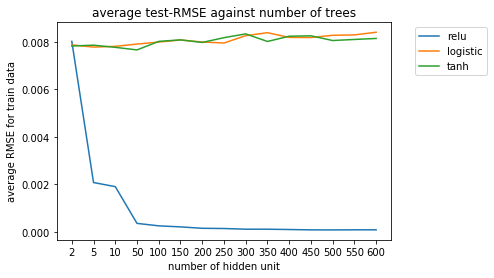

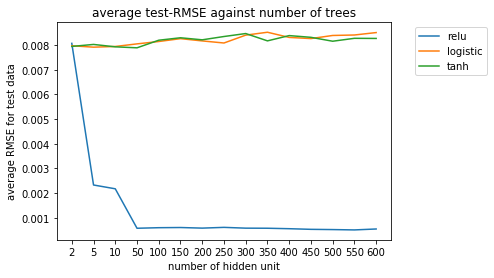

In [8]:
plt.figure()
plt.title('average test-RMSE against number of trees')
plt.xlabel('number of hidden unit')
plt.xticks([j for j in range(15)],hidden_units)  
plt.ylabel('average RMSE for train data')
plt.plot(range(15), avg_RMSE[:,:,0])
plt.legend(('relu','logistic','tanh' ),loc='upper right', bbox_to_anchor=(1.3, 1))


plt.figure()
plt.title('average test-RMSE against number of trees')
plt.xlabel('number of hidden unit')
plt.xticks([j for j in range(15)],hidden_units)  
plt.ylabel('average RMSE for test data')
plt.plot(range(15), avg_RMSE[:,:,1])
plt.legend(('relu','logistic','tanh' ),loc='upper right', bbox_to_anchor=(1.3, 1))
